In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-07 02:38:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-07 02:38:10 (67.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-06-07 02:38:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   224MB/s    in 0.7s    

2023-06-07 02:38:21 (224 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
unzip_data("10_food_classes_10_percent.zip")

In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [6]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [7]:
import tensorflow as tf
IMG_SIZE = (224, 224)

In [8]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [10]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [11]:
for images, labels in train_data_10_percent.take(1):
    print(images, labels)

tf.Tensor(
[[[[3.48724480e+01 1.68724480e+01 1.68724480e+01]
   [3.17857132e+01 1.57857141e+01 1.57857141e+01]
   [2.87755108e+01 1.42142859e+01 1.34948978e+01]
   ...
   [2.10000092e+02 2.03000092e+02 1.85428619e+02]
   [2.23117401e+02 2.16117401e+02 1.97117401e+02]
   [2.35000244e+02 2.29000244e+02 2.07000244e+02]]

  [[3.07653046e+01 1.47653065e+01 1.47653065e+01]
   [2.82142849e+01 1.39387760e+01 1.30765305e+01]
   [2.68316307e+01 1.34285717e+01 1.22295923e+01]
   ...
   [2.21714371e+02 2.14714371e+02 1.97142899e+02]
   [2.33071503e+02 2.26071503e+02 2.07071503e+02]
   [2.47454254e+02 2.41454254e+02 2.19454254e+02]]

  [[2.59336739e+01 1.25765305e+01 1.13622446e+01]
   [2.78418369e+01 1.66734695e+01 1.47295923e+01]
   [2.55714264e+01 1.47857141e+01 1.27857141e+01]
   ...
   [2.40739914e+02 2.35382767e+02 2.19168488e+02]
   [2.49770477e+02 2.45199036e+02 2.26142914e+02]
   [2.55000000e+02 2.53061203e+02 2.33275497e+02]]

  ...

  [[2.04255081e+02 1.23255081e+02 3.20408211e+01]
   [2

In [12]:
IMG_SIZE+(3,)

(224, 224, 3)

In [13]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,), name="input_layer")

x = base_model(inputs)

print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

print(f"Shape after GlobalAveragePooling2D(): {x.shape}")

16705208/16705208 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D(): (None, 1280)


In [14]:
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

In [15]:
model_0 = tf.keras.Model(inputs, outputs)

In [16]:
model_0.compile(loss="categorical_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['accuracy'])

In [17]:
model_0_history = model_0.fit(train_data_10_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data_10_percent,
                                validation_steps=int(0.25 * len(test_data_10_percent)),
                                callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20230607-023829
Epoch 1/5


2023-06-07 02:38:36.608958: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


24/24 [==============================] - 19s 222ms/step - loss: 1.8616 - accuracy: 0.4360 - val_loss: 1.2957 - val_accuracy: 0.7385
Epoch 2/5
24/24 [==============================] - 3s 128ms/step - loss: 1.0729 - accuracy: 0.7640 - val_loss: 0.8728 - val_accuracy: 0.8109
Epoch 3/5
24/24 [==============================] - 4s 167ms/step - loss: 0.7710 - accuracy: 0.8293 - val_loss: 0.6867 - val_accuracy: 0.8470
Epoch 4/5
24/24 [==============================] - 4s 140ms/step - loss: 0.6272 - accuracy: 0.8467 - val_loss: 0.6327 - val_accuracy: 0.8339
Epoch 5/5
24/24 [==============================] - 4s 168ms/step - loss: 0.5420 - accuracy: 0.8773 - val_loss: 0.5446 - val_accuracy: 0.8569


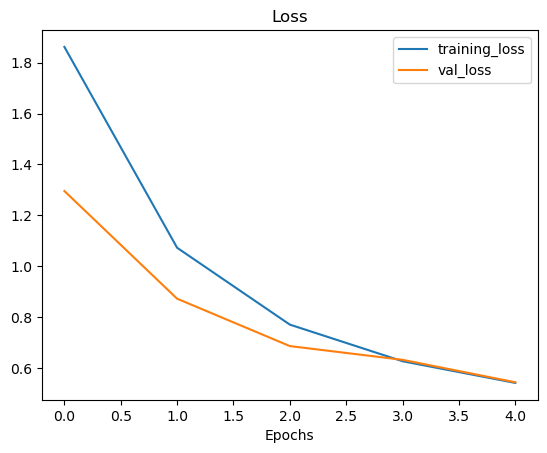

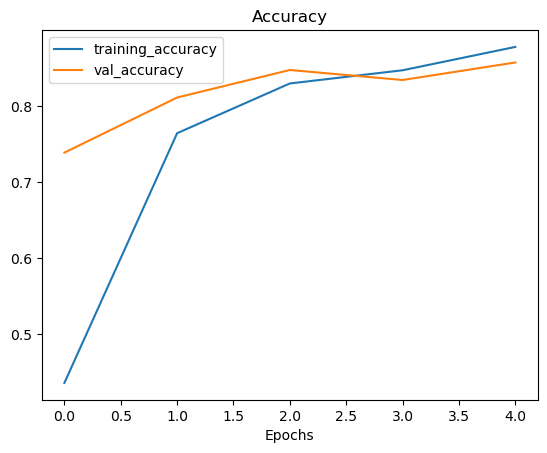

In [18]:
plot_loss_curves(model_0_history)

In [19]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [20]:
len(base_model.layers)

238

In [21]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [22]:
len(model_0.layers)

4

### Feature vector and `tf.keras.layers.GlobalAveragePooling2D()`

In [23]:
input_shape = (1, 4, 5, 3)

tf.random.set_seed(42)

input_tensor = tf.random.normal(input_shape)
print(f"Random tensor: \n {input_tensor} \n")

average_pooling_2D = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

print(f"After global 2D pooling: \n {average_pooling_2D} \n")

Random tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]
   [-0.59722406 -1.9171132  -0.62044144]]

  [[ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]
   [ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]]

  [[ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]
   [-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]]

  [[-0.35819843  0.88698614  0.52744764]
   [ 0.70402247 -0.33421248  0.21639644]
   [-0.97485447 -0.20757681 -0.03647729]
   [-1.3353444   0.6885855   1.1110833 ]
   [ 0.40130252  0.6320586  -0.39030614]]]] 

After global 2D pooling: 
 [[-0.13519286 -0.32778087 -0.18581301]] 



In [24]:
print(f"average_pooling_2D shape: {average_pooling_2D.shape}")
print(f"random tensor shape: {input_tensor.shape}")

average_pooling_2D shape: (1, 3)
random tensor shape: (1, 4, 5, 3)


As we can see `GlobalAveragePooling2D()` converts the tensor to a vector ( (4, 5) is gone after average poling).<br>  

In [25]:
cstom_reduce = tf.reduce_mean(input_tensor, axis=[1, 2])
print(f"Custom reduce: {cstom_reduce} \n")
print(f"After global 2D pooling: {average_pooling_2D} \n")

Custom reduce: [[-0.13519286 -0.32778087 -0.18581301]] 

After global 2D pooling: [[-0.13519286 -0.32778087 -0.18581301]] 



Let's do a quick experiment with `tf.keras.layers.GlobalMaxPool2D()`

In [26]:
pooling_2D = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
print(f"After max pool 2D: {pooling_2D}")
print(f"After global 2D pooling: {average_pooling_2D} ")

After max pool 2D: [[0.9058464 1.1603122 1.6994323]]
After global 2D pooling: [[-0.13519286 -0.32778087 -0.18581301]] 


## Creating `model_1` (1% data with data augmentation)

In [27]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import preprocessing

In [28]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-06-07 02:39:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 172.253.117.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   206MB/s    in 0.6s    

2023-06-07 02:39:19 (206 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [29]:
unzip_data("10_food_classes_1_percent.zip")

In [30]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [31]:
walk_through_dir(train_dir_1_percent)

There are 10 directories and 0 images in '10_food_classes_1_percent/train/'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.


In [32]:
IMG_SIZE = (224, 224)
train_data_1_percent = preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                  label_mode="categorical",
                                                                  image_size=IMG_SIZE,
                                                                  batch_size=32)

test_data = preprocessing.image_dataset_from_directory(test_dir,
                                                       label_mode="categorical",
                                                       image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [33]:
image_augmentation = tf.keras.Sequential([
    layers.RandomFlip(),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2)
], name="image_augmentation")

In [34]:
# view a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

(-0.5, 610.5, 467.5, -0.5)

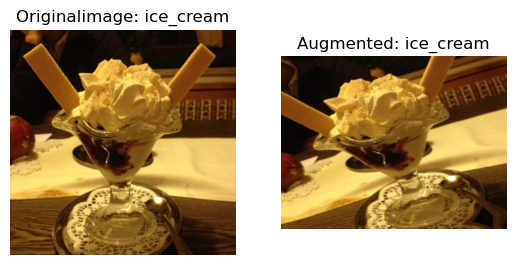

In [35]:
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(f"Originalimage: {target_class}")
plt.axis(False)

augmented_img = image_augmentation(img/255.)
plt.subplot(1, 2, 2)
plt.imshow(augmented_img)
plt.title(f"Augmented: {target_class}")
plt.axis(False)

In [36]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")

x = image_augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

24274472/24274472 [==============================] - 0s 0us/step


In [37]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [38]:
model_1_history = model_1.fit(train_data_1_percent,
                  epochs=5,
                  steps_per_epoch=len(train_data_1_percent),
                  validation_data=test_data,
                  validation_steps=int(0.25 * len(test_data)),
                  callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_augmentation")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_augmentation/20230607-023925
Epoch 1/5
3/3 [==============================] - 15s 3s/step - loss: 2.4363 - accuracy: 0.0429 - val_loss: 2.2596 - val_accuracy: 0.1266
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.1960 - accuracy: 0.1571 - val_loss: 2.1613 - val_accuracy: 0.1891
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 2.0521 - accuracy: 0.2857 - val_loss: 2.0673 - val_accuracy: 0.2500
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.8617 - accuracy: 0.5000 - val_loss: 1.9653 - val_accuracy: 0.3125
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.7251 - accuracy: 0.5286 - val_loss: 1.8879 - val_accuracy: 0.3668


In [39]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 image_augmentation (Sequent  (None, None, 3)          0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [40]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 6s 67ms/step - loss: 1.8943 - accuracy: 0.3664


[1.8942549228668213, 0.36640000343322754]

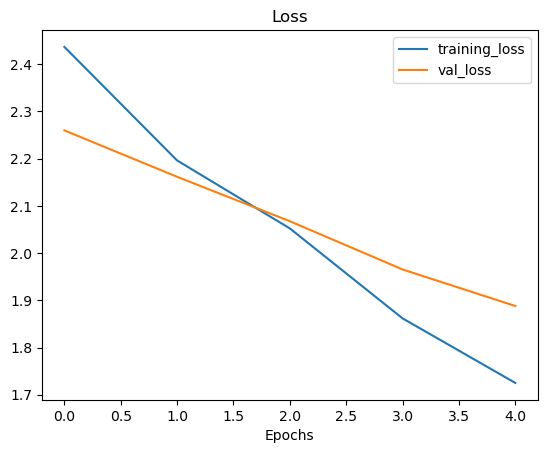

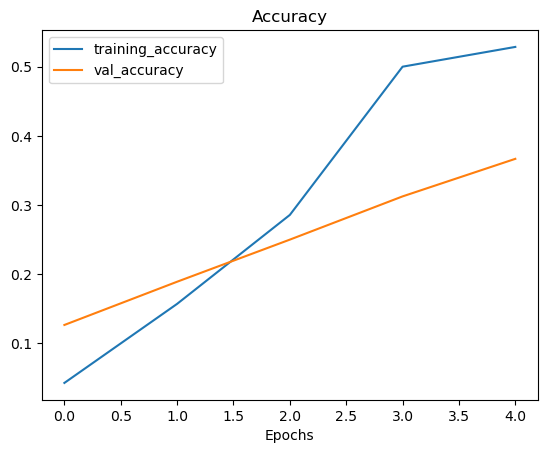

In [41]:
plot_loss_curves(model_1_history)

## Create `model_2` with 10% data and augmentation

In [42]:
test_dir = '10_food_classes_10_percent/test/'

In [43]:
train_data_10_percent = preprocessing.image_dataset_from_directory(train_dir,
                                                                   label_mode="categorical",
                                                                   image_size=IMG_SIZE,
                                                                   batch_size=32)
                                                               
test_data = preprocessing.image_dataset_from_directory(test_dir,
                                                      label_mode="categorical",
                                                      image_size=IMG_SIZE,
                                                      batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [44]:
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = image_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

In [45]:
model_2 = tf.keras.Model(inputs, outputs)

In [46]:
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [47]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                        save_weights_only=True,
                                                        save_best_only=True,
                                                        save_freq="epoch",
                                                        verbose=1)

In [48]:
model_2_history = model_2.fit(train_data_10_percent,
                             epochs=5,
                             steps_per_epoch=len(train_data_10_percent),
                             validation_data=test_data,
                             validation_steps=int(0.25 * len(test_data)),
                             callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_augmentation"),
                                       checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_augmentation/20230607-024009
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0009 - accuracy: 0.3373
Epoch 1: val_loss improved from inf to 1.50689, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 22s 588ms/step - loss: 2.0009 - accuracy: 0.3373 - val_loss: 1.5069 - val_accuracy: 0.6447
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4299 - accuracy: 0.6040
Epoch 2: val_loss improved from 1.50689 to 1.10687, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 15s 596ms/step - loss: 1.4299 - accuracy: 0.6040 - val_loss: 1.1069 - val_accuracy: 0.7319
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1674 - accuracy: 0.6680
Epoch 3: val_loss improved from 1.10687 to 0.92176, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt

In [49]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 5s 61ms/step - loss: 0.7057 - accuracy: 0.8176


[0.705729603767395, 0.8176000118255615]

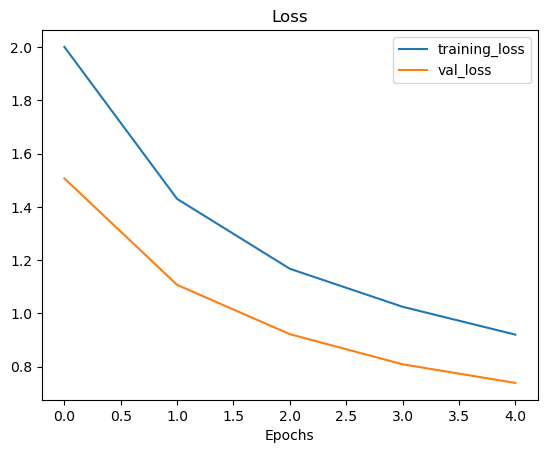

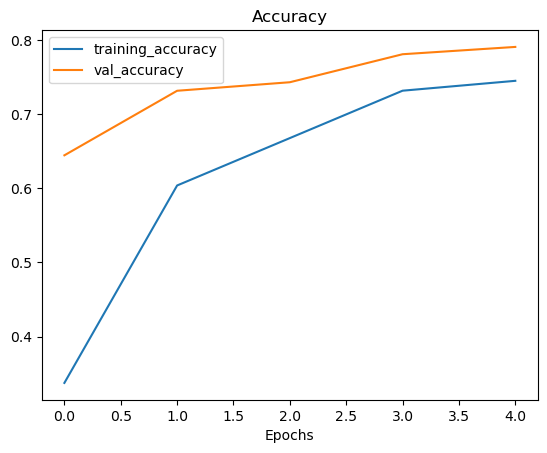

In [50]:
plot_loss_curves(model_2_history)

In [51]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 5s 61ms/step - loss: 0.7057 - accuracy: 0.8176


In [52]:
results_10_percent_data_aug == loaded_weights_model_results

True

In [53]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 image_augmentation (Sequent  (None, None, 3)          0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

## Creating `model_3`

In [54]:
model_2.layers

In [55]:
for layer in model_2.layers:
    print(layer.trainable)

True
True
False
True
True


In [57]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 image_augmentation (Sequent  (None, None, 3)          0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [58]:
print(len(model_2.layers[2].trainable_variables))

0


In [59]:
print(base_model.trainable_variables)

[]


In [60]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [61]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
    layer.trainable = False

In [65]:
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower for fine tuning
               metrics=["accuracy"])

In [68]:
for layer in model_2.layers:
    print(layer.trainable)

True
True
True
True
True


In [90]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

Last 10 layers are now trainabale

In [66]:
print(len(model_2.layers[2].trainable_variables))

10


In [71]:
model_2_history.epoch

[0, 1, 2, 3, 4]

In [76]:
fine_tune_epochs = 5 + 5

model_3_history = model_2.fit(train_data_10_percent,
                             epochs=fine_tune_epochs,
                             validation_data=test_data,
                             initial_epoch=model_2_history.epoch[-1],
                             validation_steps=int(0.25 * len(test_data)),
                             callbacks=[create_tensorboard_callback("transfer_learning", "unfrizing_some_layer_of_base_model")])

Saving TensorBoard log files to: transfer_learning/unfrizing_some_layer_of_base_model/20230607-031031
Epoch 5/10
24/24 [==============================] - 23s 475ms/step - loss: 0.7883 - accuracy: 0.7667 - val_loss: 0.5642 - val_accuracy: 0.8158
Epoch 6/10
24/24 [==============================] - 9s 374ms/step - loss: 0.6495 - accuracy: 0.8133 - val_loss: 0.5033 - val_accuracy: 0.8306
Epoch 7/10
24/24 [==============================] - 9s 382ms/step - loss: 0.6312 - accuracy: 0.8093 - val_loss: 0.4780 - val_accuracy: 0.8421
Epoch 8/10
24/24 [==============================] - 8s 304ms/step - loss: 0.5860 - accuracy: 0.8080 - val_loss: 0.5087 - val_accuracy: 0.8240
Epoch 9/10
24/24 [==============================] - 12s 473ms/step - loss: 0.5567 - accuracy: 0.8333 - val_loss: 0.4457 - val_accuracy: 0.8487
Epoch 10/10
24/24 [==============================] - 9s 339ms/step - loss: 0.5200 - accuracy: 0.8373 - val_loss: 0.4523 - val_accuracy: 0.8536


In [77]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 5s 61ms/step - loss: 0.4530 - accuracy: 0.8528


In [86]:

def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

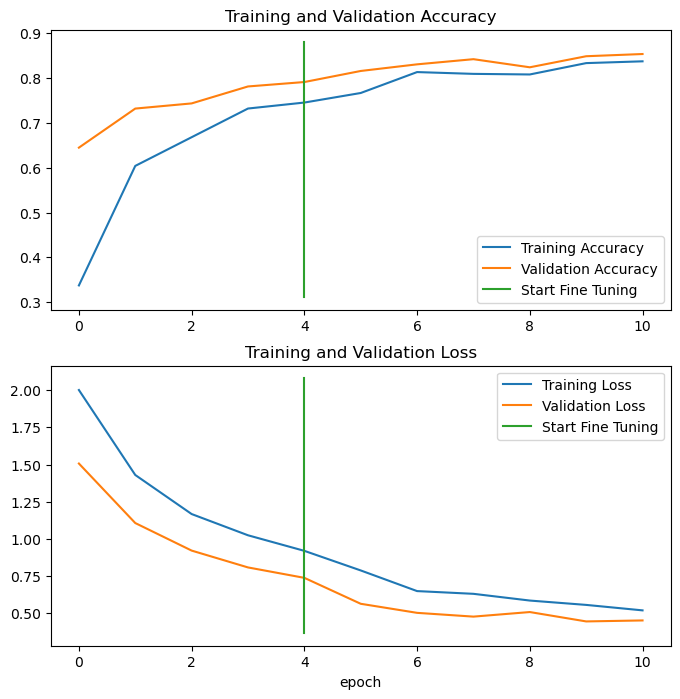

In [87]:
compare_historys(model_2_history, model_3_history)